# Assignment - 5

In [152]:
import pandas as pd

In [153]:
data = pd.read_csv("nursery.data")

In [154]:
data

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
...,...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


# Task -1

In [155]:
## Rename the columns name 
df.rename(columns={'usual': 'parents','proper':'has_nurs','complete':'form','1':'children','convenient':'housing','	convenient.1':'finance','nonprob':'social','recommended':'health','recommend':'class'}, inplace=True)

In [156]:
df

,parents,has_nurs,form,children,housing,convenient.1,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
...,...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [157]:
print(data.dtypes)

usual           object
proper          object
complete        object
1               object
convenient      object
convenient.1    object
nonprob         object
recommended     object
recommend       object
dtype: object


In [158]:
X

,parents,has_nurs,form,children,housing,convenient.1,social,health
0,usual,proper,complete,1,convenient,convenient,nonprob,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom
...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority


In [159]:
y

0          priority
1         not_recom
2         recommend
3          priority
4         not_recom
            ...    
12954    spec_prior
12955     not_recom
12956    spec_prior
12957    spec_prior
12958     not_recom
Name: class, Length: 12959, dtype: object

In [160]:
print(X_train.dtypes)

parents         object
has_nurs        object
form            object
children        object
housing         object
convenient.1    object
social          object
health          object
dtype: object


In [161]:
print(y_train.dtypes)

object


In [162]:
acc = {
    'Decision Tree (categorical features)': [],
    'Decision Tree (categorical features in one-hot encoded form)': [],
    'Logistic Regression with L1 regularization': [],
    'k-Nearest Neighbors': []
}

In [163]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
le_data = df.copy()

for col in le_data.select_dtypes(include=['object']).columns:
    le_data[col] = le.fit_transform(le_data[col])
    
X_label = le_data.drop('class', axis=1)  
y_label = le_data['class']

OHE = OneHotEncoder(sparse=False, drop='first')
X_enc = OHE.fit_transform(X_label)
enc_df = pd.DataFrame(X_enc, columns = OHE.get_feature_names_out(input_features=X_label.columns))
print(enc_df.head())

   parents_1  parents_2  has_nurs_1  has_nurs_2  has_nurs_3  has_nurs_4  \
0        0.0        1.0         0.0         0.0         1.0         0.0   
1        0.0        1.0         0.0         0.0         1.0         0.0   
2        0.0        1.0         0.0         0.0         1.0         0.0   
3        0.0        1.0         0.0         0.0         1.0         0.0   
4        0.0        1.0         0.0         0.0         1.0         0.0   

   form_1  form_2  form_3  children_1  children_2  children_3  housing_1  \
0     0.0     0.0     0.0         0.0         0.0         0.0        0.0   
1     0.0     0.0     0.0         0.0         0.0         0.0        0.0   
2     0.0     0.0     0.0         0.0         0.0         0.0        0.0   
3     0.0     0.0     0.0         0.0         0.0         0.0        0.0   
4     0.0     0.0     0.0         0.0         0.0         0.0        0.0   

   housing_2  convenient.1_1  social_1  social_2  health_1  health_2  
0        0.0         

C:\Users\DELL\anaconda3.1\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [164]:
from sklearn.model_selection import train_test_split
def data_division(X, y):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [165]:
from sklearn.metrics import accuracy_score

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# for Decision Tree

In [167]:
from sklearn.tree import DecisionTreeClassifier
for i in range(3):
        param_grid_dt = {'max_depth': [2,4,7]}
        dt_label = DecisionTreeClassifier(random_state=42)
        acc['Decision Tree (categorical features)'].append(train_and_evaluate(dt_label, X_train_label, y_train_label, X_test_label, y_test_label))

In [168]:
for i in range(3):
    dt_enc = DecisionTreeClassifier(random_state=42)
    acc['Decision Tree (categorical features in one-hot encoded form)'].append(train_and_evaluate(dt_enc, X_train_enc, y_train_enc, X_test_enc, y_test_enc))

# for Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression
for i in range(3):
    param_grid_lr = {'C': [0.01, 0.1, 1]}
    logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    acc['Logistic Regression with L1 regularization'].append(train_and_evaluate(logreg, X_train_enc, y_train_enc, X_test_enc, y_test_enc))

# for KNN

In [170]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(3):
    param_grid_knn = {'n_neighbors': [2,4,7]}
    knn = KNeighborsClassifier()
    acc['k-Nearest Neighbors'].append(train_and_evaluate(knn, X_train_enc, y_train_enc, X_test_enc, y_test_enc))

In [171]:
acc

{'Decision Tree (categorical features)': [0.9907407407407407,
  0.9907407407407407,
  0.9907407407407407],
 'Decision Tree (categorical features in one-hot encoded form)': [0.9857253086419753,
  0.9857253086419753,
  0.9857253086419753],
 'Logistic Regression with L1 regularization': [0.9255401234567902,
  0.9255401234567902,
  0.9255401234567902],
 'k-Nearest Neighbors': [0.9182098765432098,
  0.9182098765432098,
  0.9182098765432098]}

In [172]:
import numpy as np
mean_ofaccuracy = {}
for model_name, acc_list in acc.items():
    mean_ofaccuracy[model_name] = np.mean(acc_list)

variance_ofaccuracy = {}
for model_name, acc_list in acc.items():
    variance_ofaccuracy[model_name] = np.var(acc_list)

print("Mean Accuracies:")
for model, mean_accuracy in mean_ofaccuracy.items():
    print(f'{model}: {mean_accuracy:.4f}')

print("Variance of Accuracies:")
for model, variance_accuracy in variance_ofaccuracy.items():
    print(f'{model}: {variance_accuracy:.4f}')

Mean Accuracies:
Decision Tree (categorical features): 0.9907
Decision Tree (categorical features in one-hot encoded form): 0.9857
Logistic Regression with L1 regularization: 0.9255
k-Nearest Neighbors: 0.9182
Variance of Accuracies:
Decision Tree (categorical features): 0.0000
Decision Tree (categorical features in one-hot encoded form): 0.0000
Logistic Regression with L1 regularization: 0.0000
k-Nearest Neighbors: 0.0000


In [173]:
import matplotlib.pyplot as plt
import numpy as np

methods = list(mean_ofaccuracy.keys())
mean_values = list(mean_ofaccuracy.values())
variance_values = list(variance_ofaccuracy.values())

std_devs = np.sqrt(variance_values)

## Visualization

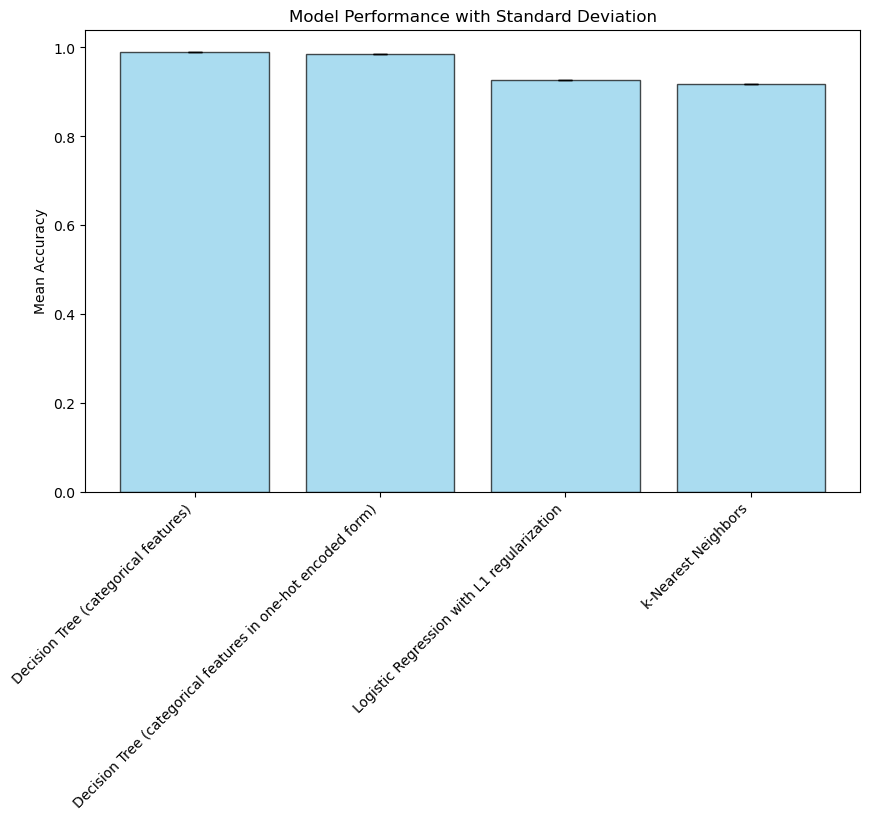

In [179]:
plt.figure(figsize=(10, 6))

plt.bar(methods, mean_values, yerr=std_devs, color='skyblue', capsize=5, edgecolor='black', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean Accuracy')
plt.title('Model Performance with Standard Deviation')
plt.show()

## Task -2

In [ ]:
#sorry.